In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In this exercise you'll try to build a neural network that predicts the price of a house according to a simple formula.

So, imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.

Hint: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands' etc.

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
5    -122.25   2.697  
6 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9767 - mae: 0.9895 - val_loss: 0.4528 - val_mae: 0.4778
Epoch 2/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4461 - mae: 0.4595 - val_loss: 0.4038 - val_mae: 0.4418
Epoch 3/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3595 - mae: 0.4257 - val_loss: 0.3970 - val_mae: 0.4448
Epoch 4/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3561 - mae: 0.4184 - val_loss: 0.3724 - val_mae: 0.4256
Epoch 5/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3383 - mae: 0.4086 - val_loss: 0.3786 - val_mae: 0.4290
Epoch 6/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3231 - mae: 0.3987 - val_loss: 0.3552 - val_mae: 0.4210
Epoch 7/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3888 - mae: 0.4039 - val_loss: 0.3590 - val_mae: 0.4370
Epoch 8/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3133 - mae: 0.3918 - val_loss: 0.3450 - val_mae: 0.4103
Epoch 9/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

Sample Predictions (in $100k):
Predicted values: [0.5826638 0.8740301 4.8336835 2.5749056 2.9327986]
Predicted: 0.58  |  Actual: 0.48
Predicted: 0.87  |  Actual: 0.46
Predicted: 4.83  |  Actual: 5.00
Predicted: 2.57  |  Actual: 2.19
Predicted: 2.93  |  Actual: 2.78


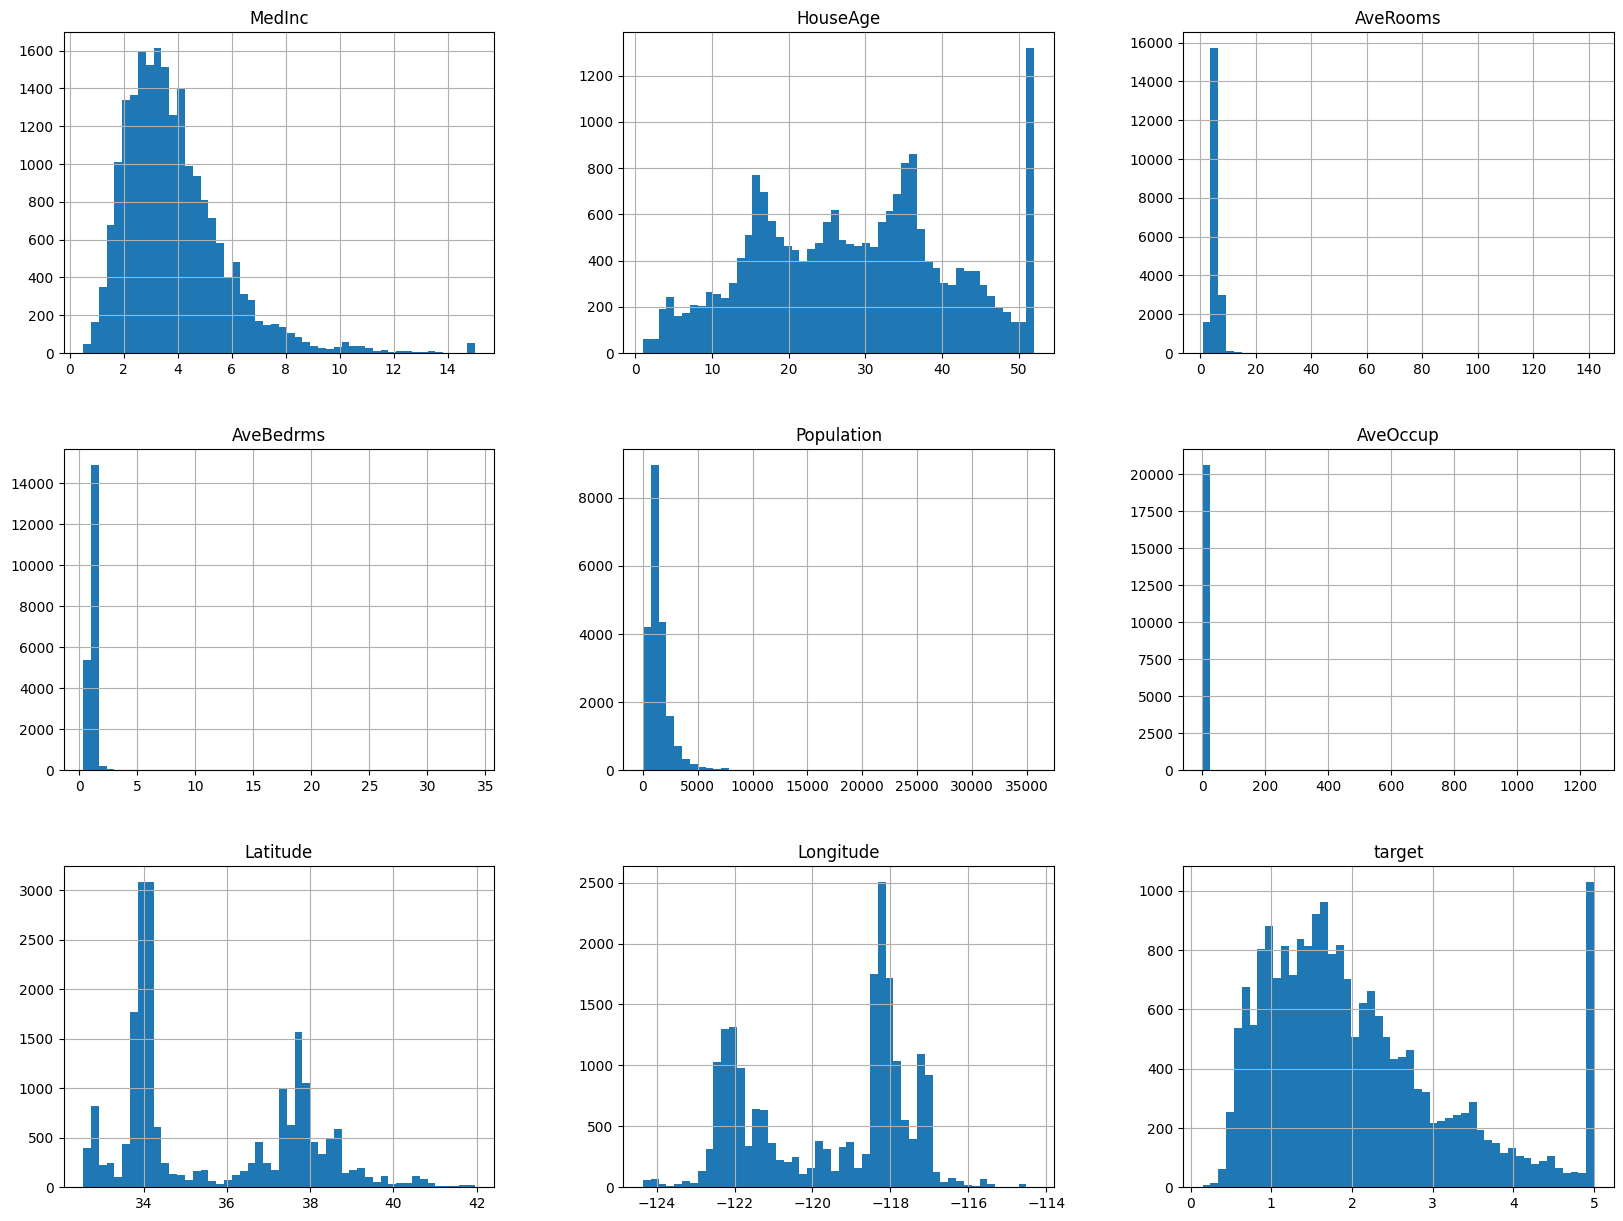

In [19]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model
housing = fetch_california_housing()
df=pd.DataFrame(housing.data,columns=housing.feature_names)
df['target']=pd.Series(housing.target)
print(df.head(10))
print(f"Shape: {df.shape}")
print(df.info())
df.describe()
df.hist(bins=50,figsize=(20,15))

# 1. Load the dataset
X = housing.data  # Features
y = housing.target  # Target (median house value in $100,000)
# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 3. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#print(X_train_scaled)
#print(X_test_scaled)
#model = # Your Code Here#
#model.compile(# Your Code Here#)
#xs = # Your Code Here#
#ys = # Your Code Here#
#model.fit(# Your Code here#)
#print(model.predict([7.0]))
# 4. Build the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output for regression
])

# 5. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)
# 6. Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, verbose=1)

# 7. Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Mean Absolute Error: {mae:.2f} (≈ ${mae * 100_000:.0f})")

# 8. Predict house values
predictions = model.predict(X_test_scaled[:5])
print("\nSample Predictions (in $100k):")
print("Predicted values:", predictions.flatten())
for i, pred in enumerate(predictions):
    print(f"Predicted: {pred[0]:.2f}  |  Actual: {y_test[i]:.2f}")